# Vamos a hacer web Scrapping usando Beautiful Soup y Yahoo financial

In [1]:
!pip install yfinance

In [2]:
!pip install yahoofinancials

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
import yfinance as yf
from yahoofinancials import YahooFinancials

In [21]:
# Creando el data set
df = yf.download('ATOM',
   start='2020-07-01',
   end='2021-09-30',
   progress=False)
df.head(100)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,9.05,9.110,8.620,8.790,8.790,255300
2020-07-02,8.86,8.933,8.320,8.580,8.580,405400
2020-07-06,8.74,9.150,8.620,9.100,9.100,396900
2020-07-07,9.04,9.100,8.565,8.610,8.610,344400
2020-07-08,8.68,9.050,8.630,8.800,8.800,249200
...,...,...,...,...,...,...
2020-11-13,9.47,9.640,9.210,9.560,9.560,155000
2020-11-16,9.61,9.700,9.350,9.615,9.615,278300
2020-11-17,9.58,9.630,9.150,9.240,9.240,184800


In [22]:
series = df['Close'].values.reshape(-1, 1)

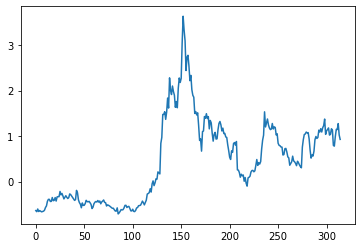

In [23]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()
plt.plot(series)
plt.show()

In [24]:
#construyendo el dataset
#Veremos si podemos usar los valores pasados de T para predecir el siguiente valor

T = 10
D = 1
X = []
Y = []

In [25]:
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [26]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (305, 10) Y.shape (305,)


In [27]:
class BaselineModel:
    def predict(self, X):
        return X[:,-1] 
#los valores obtenidos para cada secuencia de inputs

In [28]:
# entrenar y probar
Xtrain, Ytrain = X[:-N//2], Y[:-N//2]
Xtest, Ytest = X[-N//2:], Y[-N//2:]

In [29]:
#obteniendo las predicciones
model = BaselineModel()
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [30]:
#transformaciones inversas
Ytrain2 = scaler.inverse_transform(Ytrain.reshape(-1, 1)).flatten()
Ytest2 = scaler.inverse_transform(Ytest.reshape(-1, 1)).flatten()
Ptrain2 = scaler.inverse_transform(Ptrain.reshape(-1, 1)).flatten()
Ptest2 = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()
print("baseline train mae:", mae(Ytrain2,Ptrain2))
print("baseline test mae:", mae(Ytest2, Ptest2))

baseline train mae: 0.823552740247626
baseline test mae: 0.9576471366134345


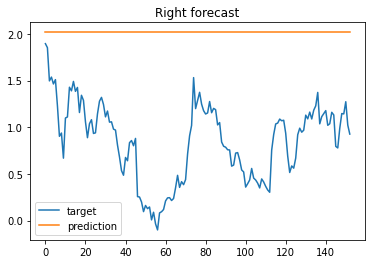

In [32]:
#right forecast
forecast = []
input_ = Xtest[0]
while len(forecast) < len(Ytest):
    f = model.predict(input_.reshape(1, T))[0]
    forecast.append(f)
    # make a new input with the latest forecast
    input_ = np.roll(input_, -1)
    input_[-1] = f
plt.plot(Ytest, label='target')
plt.plot(forecast, label='prediction')
plt.legend()
plt.title("Right forecast")
plt.show()